In [ ]:
pip install seaborn

Title:

In-vehicle coupon recommendation

https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

Objective : 

The main intension of this dataset is to find whether a person will accept the coupon recommended to him if given in different driving scenarios.

Dataset :

The data set we have used is collected from :

Location :

https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation#

How data was discovered ?

I was searching for the datasets and found this dataset interesting because I never thought that time, driving to or from location, weather, etc. will effect coupon acceptance rate.

Is it free to download ?

Yes.

Is data legal to access ?

Yes.

Data rows, column and size :

- It contains 12684 instances with 23 attributes

- Size : 2.113MB

Questions :

I . Whether a person will accept the coupon recommended to him if given in different driving scenarios like :

Destination
Weather/ Temperature
II. Will income levels have impact on coupon recommendation ?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Grouping based on passanger, weather, coupon, education, occupation and income AND
### To find who all accepted the coupon

In [ ]:
df.groupby(["passanger", "weather", "coupon", "education", "occupation", "income"])["Y"].count()

print(df.groupby(["passanger", "weather", "coupon", "income", "toCoupon_GEQ15min"])["Y"].count())

print(df.groupby(["passanger", "weather", "coupon", "income", "toCoupon_GEQ25min"])["Y"].count())

df.groupby(["passanger", "weather", "coupon", "income", "toCoupon_GEQ15min"])["Y"].value_counts()



passanger  weather  coupon           income            toCoupon_GEQ15min
Alone      Rainy    Bar              $100000 or More   0                     2
                                                       1                    35
                                     $12500 - $24999   0                     3
                                                       1                    37
                                     $25000 - $37499   0                     1
                                                                            ..
Partner    Sunny    Restaurant(<20)  $75000 - $87499   1                    10
                                     $87500 - $99999   0                     4
                                                       1                     9
                                     Less than $12500  0                     7
                                                       1                     9
Name: Y, Length: 620, dtype: int64
passanger  weather  cou

passanger  weather  coupon           income            toCoupon_GEQ15min  Y
Alone      Rainy    Bar              $100000 or More   0                  0     2
                                                       1                  0    24
                                                                          1    11
                                     $12500 - $24999   0                  0     3
                                                       1                  0    24
                                                                               ..
Partner    Sunny    Restaurant(<20)  $87500 - $99999   1                  1     5
                                                                          0     4
                                     Less than $12500  0                  1     5
                                                                          0     2
                                                       1                  1     9
Name: Y, Length: 1126,

In [ ]:
df = pd.read_csv("/content/in-vehicle-coupon-recommendation.csv")

print(df['passanger'].unique())
print(df['weather'].unique())
print(df['coupon'].unique())
print(df['RestaurantLessThan20'].unique())
print(df['education'].unique())
print(df['occupation'].unique())
print(df['income'].unique())


df.groupby(["passanger", "weather", "coupon", "education", "occupation", "income"]).count()
	
print(df['passanger'][df["passanger"].str.contains("Friend", na=False)].count())
print(df['passanger'][df["passanger"].str.contains("Friend", na=False) & df["Y"] == 1].count())


print(df['passanger'][df["passanger"].str.contains("Alone", na=False)].count())
print(df['passanger'][df["passanger"].str.contains("Alone", na=False) & df["Y"] == 1].count())



print(df['passanger'][df["passanger"].str.contains("Kid", na=False)].count())
print(df['passanger'][df["passanger"].str.contains("Kid", na=False) & df["Y"] == 1].count())


print(df['passanger'][df["passanger"].str.contains("Partner", na=False)].count())
print(df['passanger'][df["passanger"].str.contains("Partner", na=False) & df["Y"] == 1].count())

df.head(5)



    #print(df['passanger'][df["passanger"].str.contains("Friend", na=False)].count())

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Sunny' 'Rainy' 'Snowy']
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
['4~8' '1~3' 'less1' 'gt8' nan 'never']
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishi

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


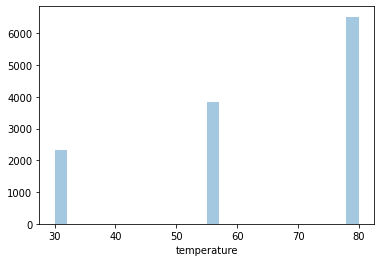

In [ ]:
sns.distplot(df['temperature'],kde =False)

UFuncTypeError: ignored

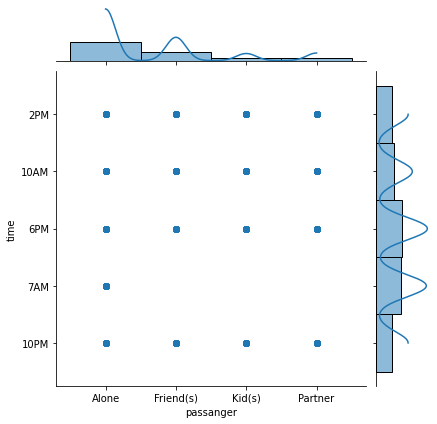

In [ ]:
sns.jointplot(x='passanger', y='time', data = df, kind = 'reg')

###pair plot

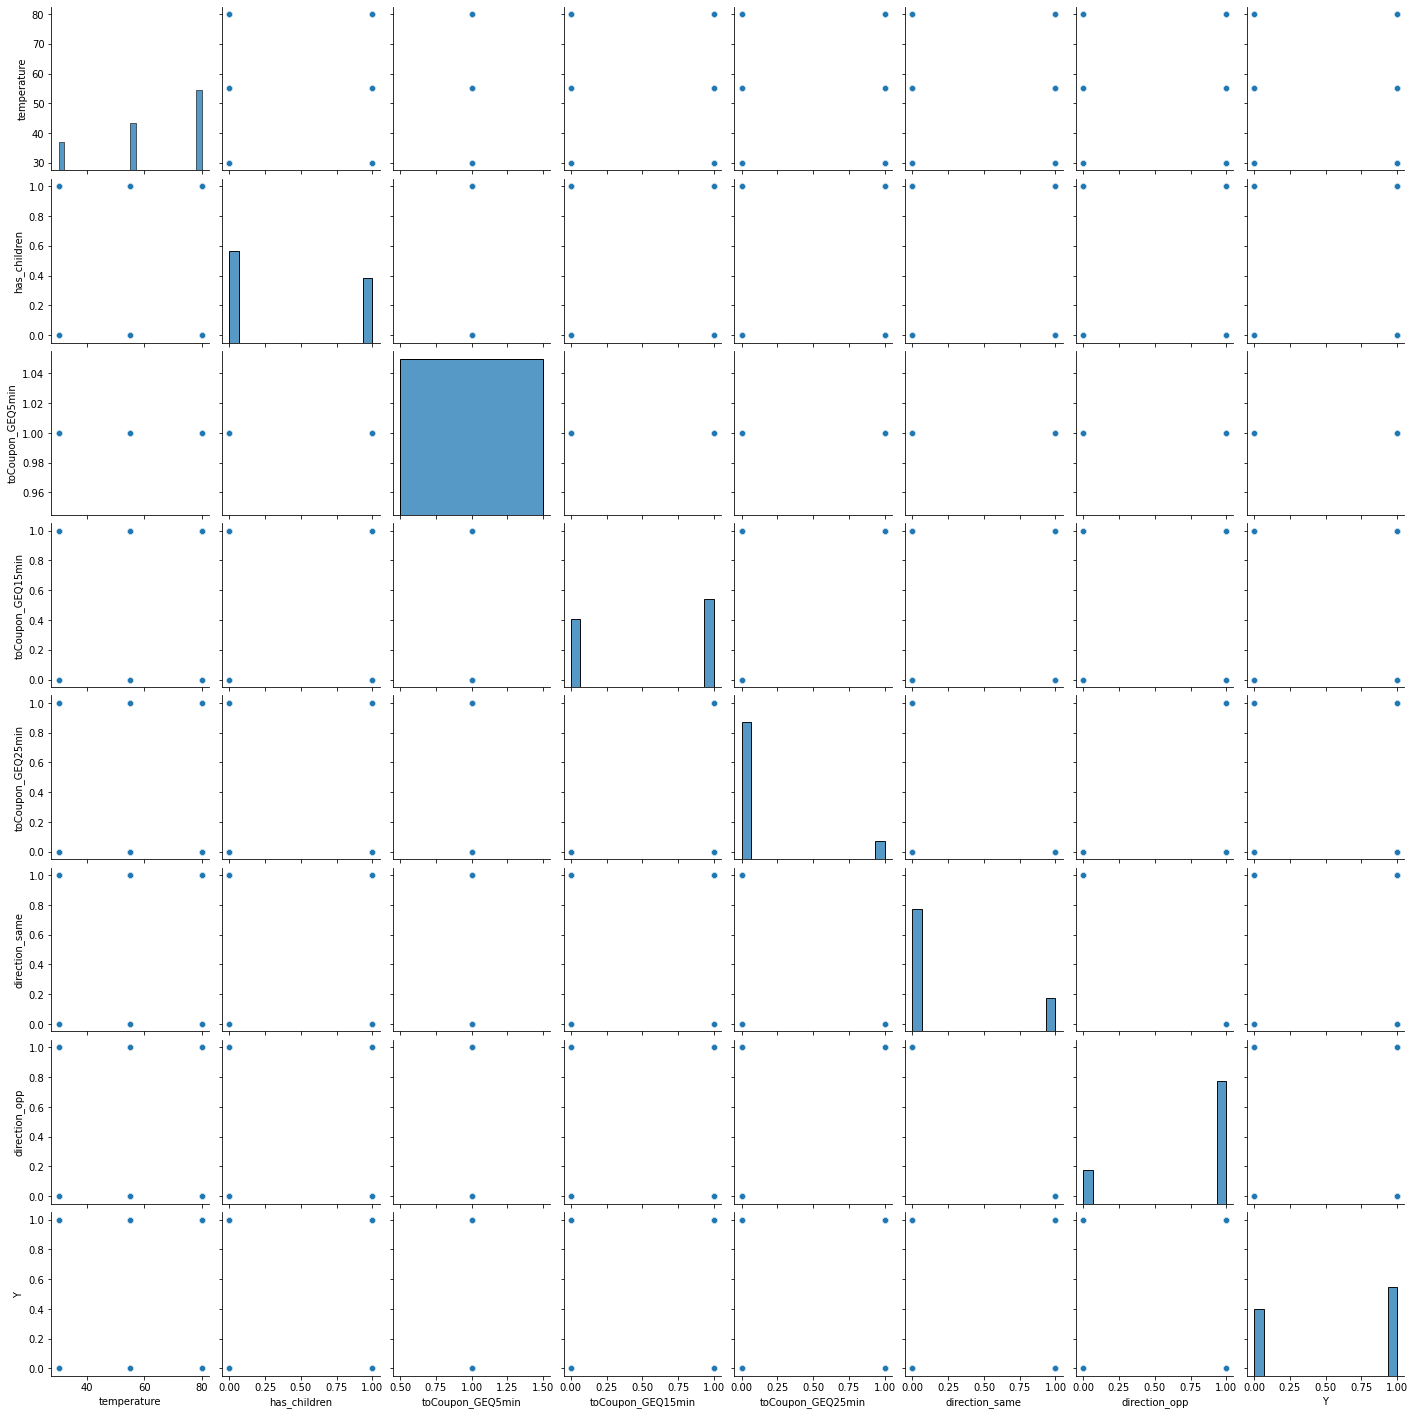

In [ ]:
sns.pairplot(df)